# Histogramas y máscaras

Las máscaras se pueden usar para enfocar regiones específicas de una imagen que nos interesan. Ahora vamos a construir una máscara y calcular histogramas de color solo para la región enmascarada.

### Importar librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Función para mostrar imágenes

In [2]:
def mostrar_imagen(titulo, imagen):
  imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
  plt.imshow(imagen)
  plt.title(titulo)
  plt.grid(False)
  plt.show()

Diccionario para establecer los argumentos

In [11]:
args = {"imagen": "beach.png"}

Función para el histograma

In [12]:
def plot_histograma(imagen, titulo, mascara = None):
    # Guarda los canales de la imagenn, 
    # inicializa la tupla de colores
    # y la figura
    canales = cv2.split(imagen)
    colores = ("b", "g", "r")
    plt.figure()
    plt.title(titulo)
    plt.xlabel("Bins")
    plt.ylabel("# de Pixeles")

    # Bucle sobre los canales de la imagen
    for (canal, color) in zip(canales, colores):
        # Crear un histograma para el canal actual y dibujarlo
        hist = cv2.calcHist([canal], [0], mascara, [256], [0, 256])
        plt.plot(hist, color = color)
        plt.xlim([0, 256])

### Histograma con máscara

Leer la imagen y mostrarla

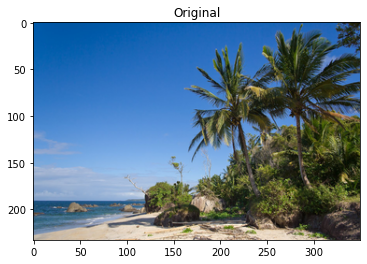

In [13]:
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)

Histograma para la imagen original

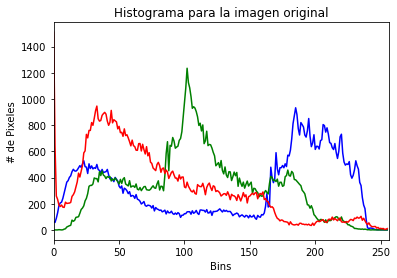

In [14]:
plot_histograma(imagen,"Histograma para la imagen original")

Construcción de una máscara, la máscara será de color NEGRO para las regiones que se quieran ignorar y BLANCO para las regiones que se quieran examinar. La máscara será un rectángulo 

In [15]:
imagen.shape[:2]

(233, 350)

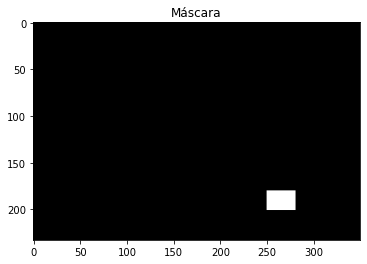

In [16]:
mascara = np.zeros(imagen.shape[:2],dtype = "uint8")
cv2.rectangle(mascara,(250,180),(280,200),255,-1)
mostrar_imagen("Máscara",mascara)

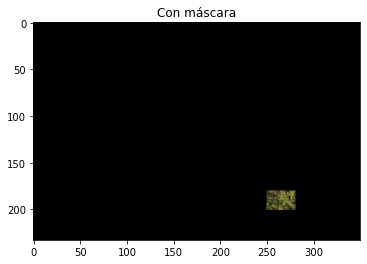

In [17]:
enmascarado = cv2.bitwise_and(imagen,imagen,mask=mascara)
mostrar_imagen("Con máscara",enmascarado)

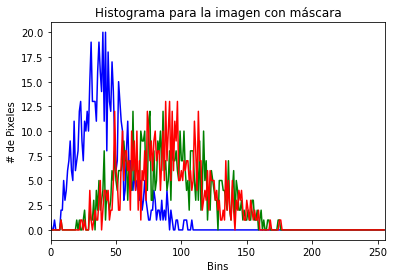

In [18]:
plot_histograma(imagen,"Histograma para la imagen con máscara",
               mascara = mascara)